In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import pymc as pm #use pymc instead of pymc3 because current versions are incompatible up to date versions of numpy and scipy
import arviz as az

## The Dataset

You can download the dataset from here: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

In [2]:
## 1 point

## ToDo: read the csv file into a dataframe and show the first 5 rows

df = pd.read_csv("diabetes.csv")
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
## 3 points

## Assign the Outcome variable to y and the rest to X.
X = df.drop(columns='Outcome', axis=1) 
y = df.Outcome.values

## USe LogisticRegression to fit the data and print out the intercept and the coefficients
lr = LogisticRegression(max_iter=200).fit(X,y)
print(f'Coefficients: {lr.coef_}')
print(f'Intercept: {lr.intercept_}')

Coefficients: [[ 1.22491822e-01  3.51096146e-02 -1.32995672e-02  7.79317558e-04
  -1.17368659e-03  8.96526256e-02  8.67762988e-01  1.49853251e-02]]
Intercept: [-8.36497424]


In [14]:
## 2 points

## Explain what the code is doing:
## What are the prior probabilities of the intercept and coefficients?
# Which likelihood distribution has been used?
## What does pm.invlogit(linreg) mean?
## What is map_est?

with pm.Model() as logreg_model:
  
    w0 = pm.Normal('w0', mu=0, sigma=100) #pymc takes 'sigma' instead of 'sd' :0
    w1 = pm.Normal('w1', mu=0, sigma=100)
    w2 = pm.Normal('w2', mu=0, sigma=100)
    w3 = pm.Normal('w3', mu=0, sigma=100)
    w4 = pm.Normal('w4', mu=0, sigma=100)
    w5 = pm.Normal('w5', mu=0, sigma=100)
    w6 = pm.Normal('w6', mu=0, sigma=100)
    w7 = pm.Normal('w7', mu=0, sigma=100)
    w8 = pm.Normal('w8', mu=0, sigma=100)
   
    
    linreg = w0 * np.ones(df.shape[0]) + w1 * df.Pregnancies.values + w2 * df.Glucose.values \
    + w3 * df.BloodPressure.values + w4 * df.SkinThickness.values + w5 * df.Insulin.values + \
    w6 * df.BMI.values + w7 * df.DiabetesPedigreeFunction.values + w8 * df.Age.values
    p_outcome = pm.invlogit(linreg)

    likelihood = pm.Bernoulli('likelihood', p_outcome, observed=df.Outcome.values)

    
    map_est= pm.find_MAP()
    print(map_est)

print("Explain what the code is doing:")
print("The code creates a log regression model with PyMC3 to estimate the probability of the binary outcome variable 'Outcome' based on the linear combination of predictor variables. According to the code, we assume the prior probabilities to be normally distributed with mean = 0 and standard deviation = 100. The linear combination of predictor variables sum(prior * variable) is defined as linreg. Since linreg can take on the value of any real number, the code applies pm.invlogit() to transform linreg to a probability scale between 0 and 1 in order to estimate the probability of 'Outcome'. Since 'Outcome' is binary, the code uses Bernoulli likelihood distribution and the transformed linreg (p_outcome) to obtain the likelihood. The result is saved as 'likelihood'. The pm.find_MAP() function is called to find the Maximum a Posteriori points of the posterior which are the point estimates of the regression coefficients that maximize posterior probability. The result is saved as 'map_est' and printed out at the end of the code.")
print("Prior Probabilities:")
print("mean (mu): 0")
print("standard deviation (sd): 100")
print("Which likelihood distribution has been used?")
print("The Bernoulli likelihood distribution is used to estimate the probability of 'Outcome' based on the predictor variables.")
print("What does pm.invlogit(linreg) mean?")
print("The pm.invlogit() function applies the inverse of a logit function for the linear predictor to take a probability value between 0 and 1.")
print("What is map_est?")
print("map_est contains the estimated MAP points of the posterior distribution which are the point estimates of the regression coefficients that maximize posterior probability.")


{'w0': array(-8.40315346), 'w1': array(0.12327692), 'w2': array(0.03516518), 'w3': array(-0.01329252), 'w4': array(0.0006127), 'w5': array(-0.00119126), 'w6': array(0.08968379), 'w7': array(0.94449183), 'w8': array(0.01483087)}
Explain what the code is doing:
The code creates a log regression model with PyMC3 to estimate the probability of the binary outcome variable 'Outcome' based on the linear combination of predictor variables. According to the code, we assume the prior probabilities to be normally distributed with mean = 0 and standard deviation = 100. The linear combination of predictor variables sum(prior * variable) is defined as linreg. Since linreg can take on the value of any real number, the code applies pm.invlogit() to transform linreg to a probability scale between 0 and 1 in order to estimate the probability of 'Outcome'. Since 'Outcome' is binary, the code uses Bernoulli likelihood distribution and the transformed linreg (p_outcome) to obtain the likelihood. The resul

Only 400 samples in chain.
Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [w0]
>Metropolis: [w1]
>Metropolis: [w2]
>Metropolis: [w3]
>Metropolis: [w4]
>Metropolis: [w5]
>Metropolis: [w6]
>Metropolis: [w7]
>Metropolis: [w8]


Sampling 2 chains for 500 tune and 400 draw iterations (1_000 + 800 draws total) took 31 seconds.


The plots below visualize the posterior distributions of each of the parameters. Each histogram corresponds to one of the parameters (w0 to w8) and shows the distribution of the posterior samples, the mean, and the credible interval that contains 94% of the posterior probability density for each parameter.


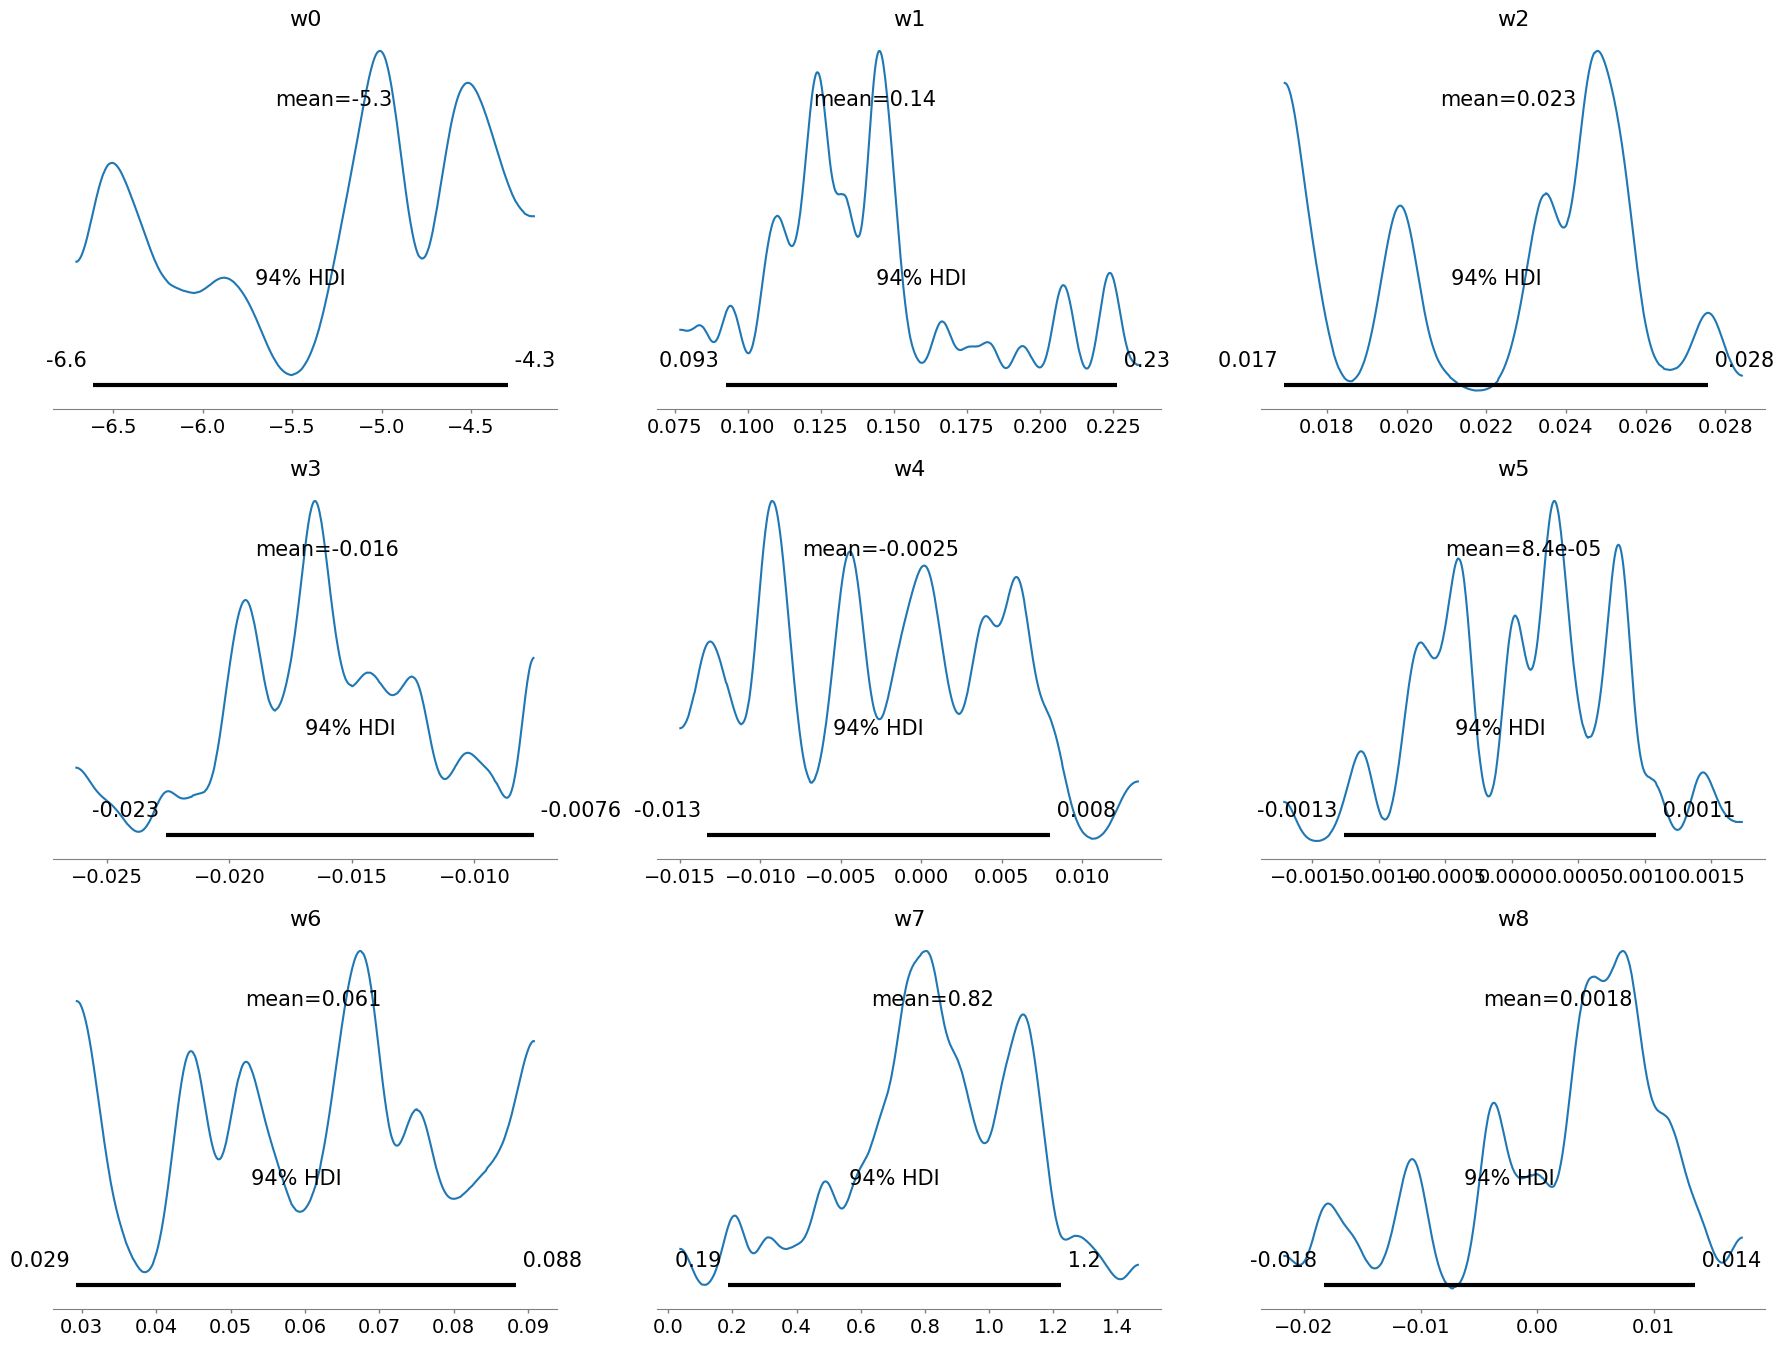

In [15]:
## 2 points

with logreg_model:
## ToDo: draw 400 samples using pm.Metropolis() and assign to the variable trace
    trace = pm.sample(400, tune=500, step=pm.Metropolis()) 
    print("The plots below visualize the posterior distributions of each of the parameters. Each histogram corresponds to one of the parameters (w0 to w8) and shows the distribution of the posterior samples, the mean, and the credible interval that contains 94% of the posterior probability density for each parameter.")
    az.plot_posterior(trace)
    